<h1>Introduction to Data Science (LTAT.02.002) </h1><br>
<h2>Project: Mobile Price Classification</h2> <br>
<h3>Team: Markkus Koddala, </h3> <br>
Description:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 30) 
pd.set_option('display.max_rows', 50)

In [2]:
 #read data in
df = pd.read_csv("train.csv", sep=",")
df_test = pd.read_csv("test.csv", sep=",")

<h1> Step 1. Data understanding </h>

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.shape

(2000, 21)

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
for col in df.columns:
  print(col, len(df[col].unique()), df[col].unique())

battery_power 1094 [ 842 1021  563 ... 1139 1467  858]
blue 2 [0 1]
clock_speed 26 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim 2 [0 1]
fc 20 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g 2 [0 1]
int_memory 63 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep 10 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt 121 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86


In [11]:
categorical_features=list()
numerical_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<10:
      categorical_features.append(column_name)
    else:
      numerical_features.append(column_name)

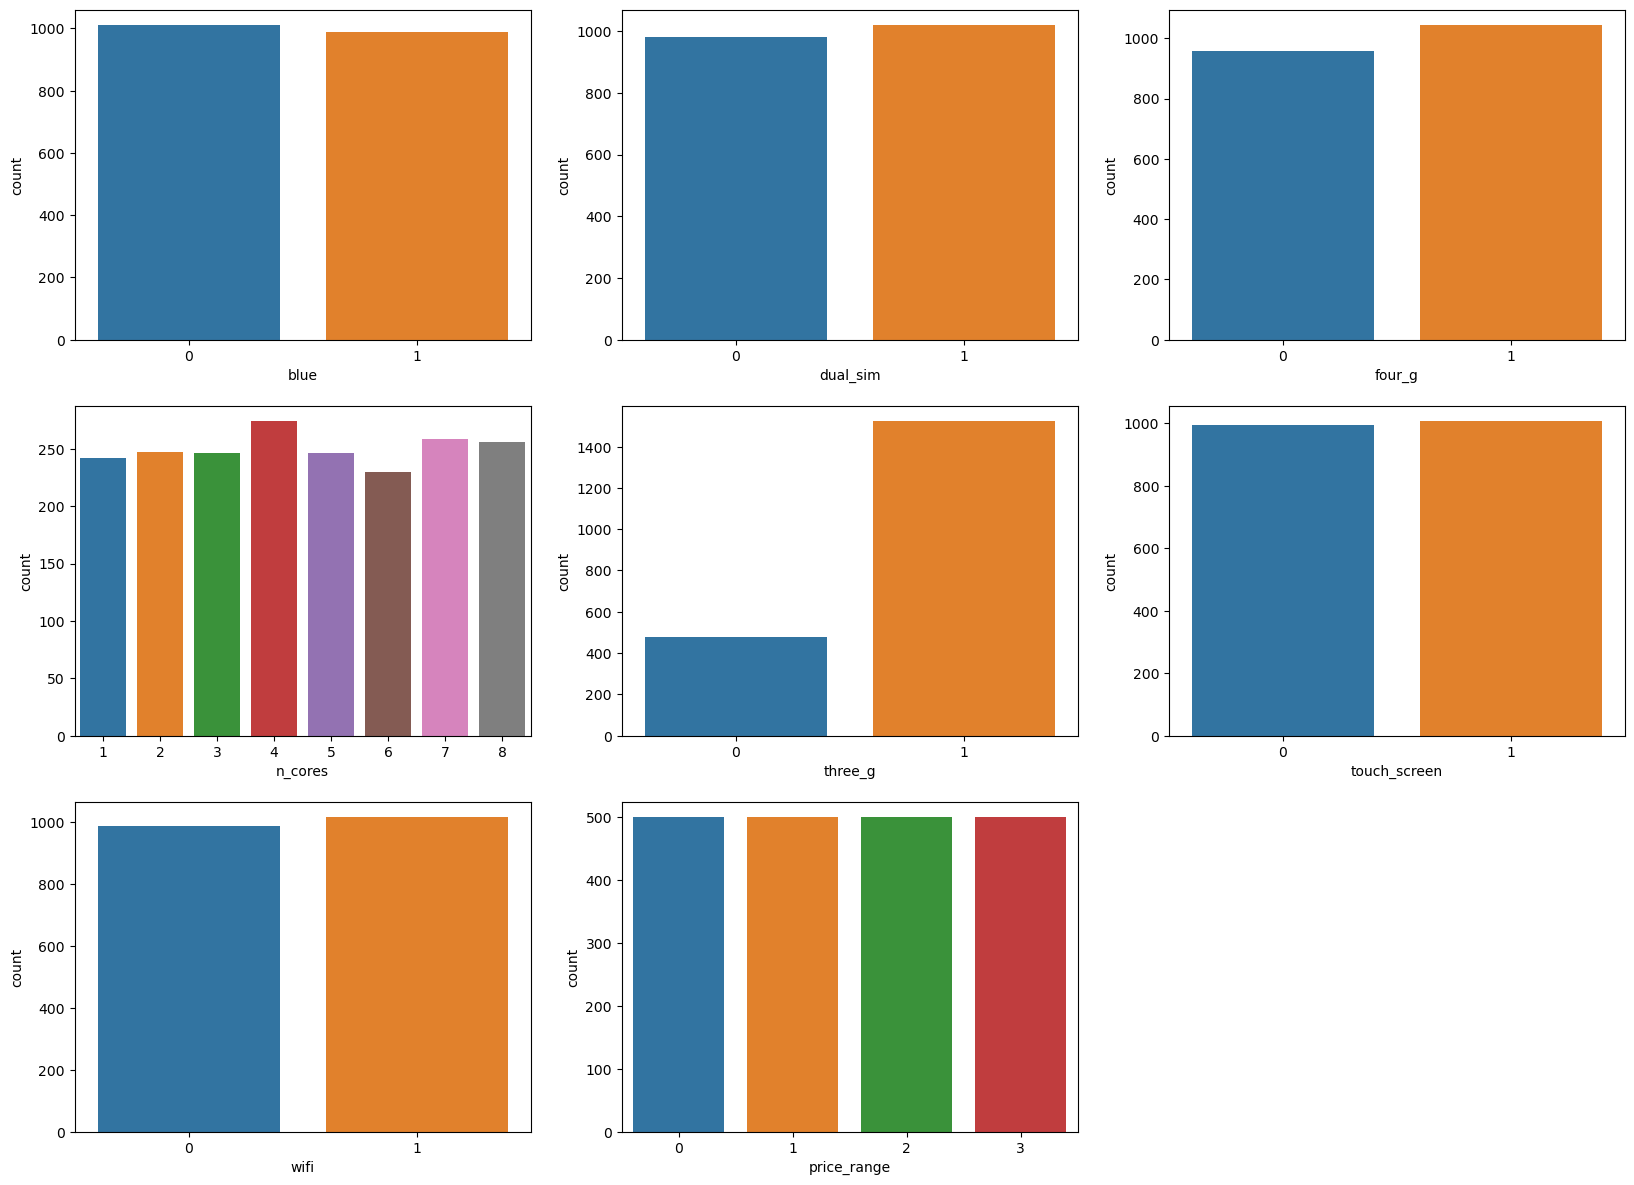

In [12]:
i = 1
plt.figure(figsize = (20,30))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df)
    i +=1

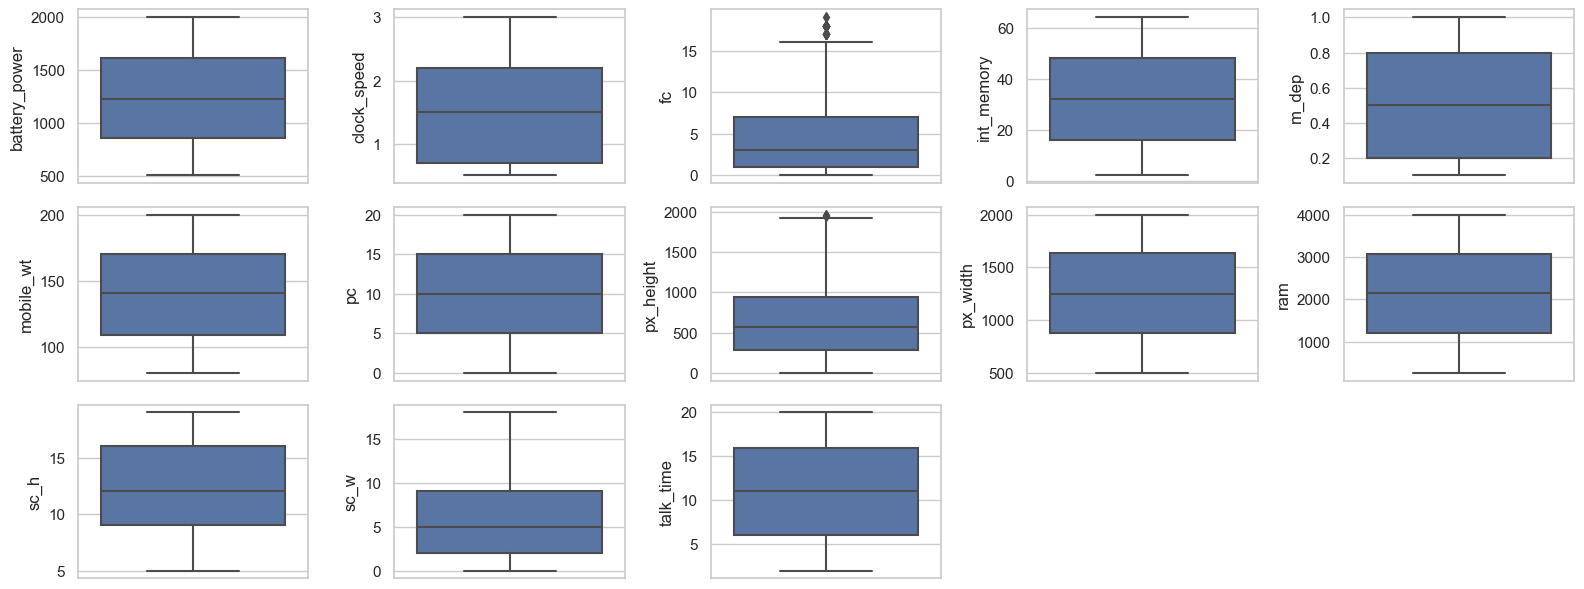

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
for i, column in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(y=column, data=df)
    plt.ylabel(column)
    plt.tight_layout()

plt.show()

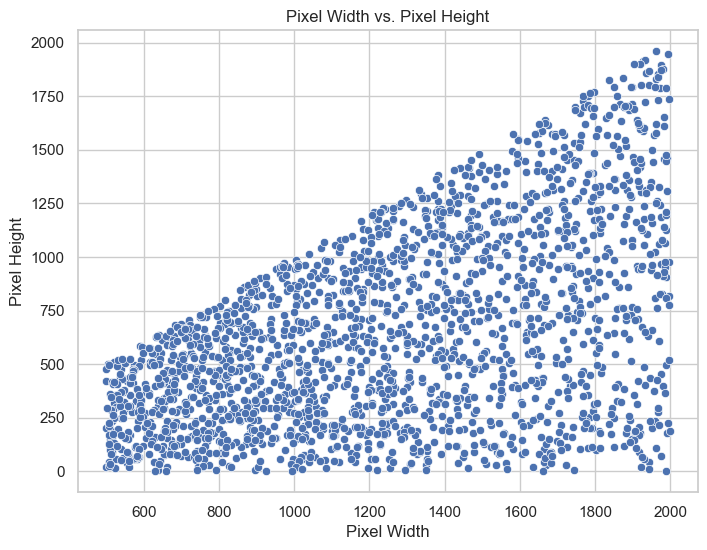

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='px_width', y='px_height', data=df)

plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.title('Pixel Width vs. Pixel Height')

plt.show()

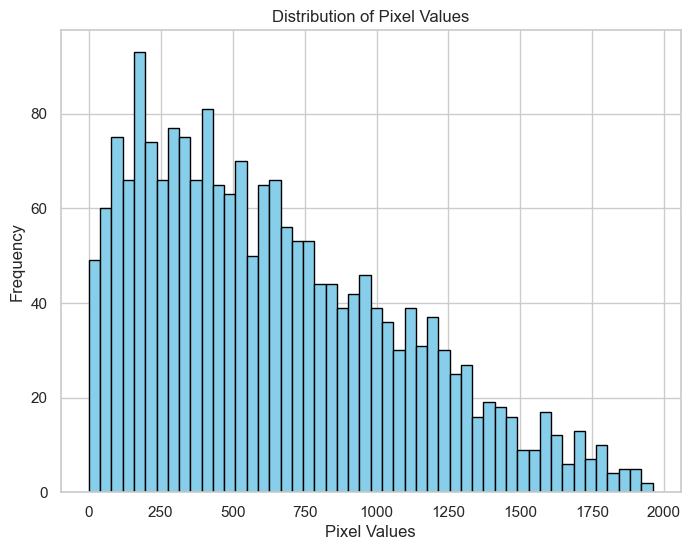

In [15]:
plt.figure(figsize=(8, 6))

plt.hist(df['px_height'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values')

plt.show()

In [16]:
zero_px_height_rows = df[df['px_height'] == 0]
print(zero_px_height_rows)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  11          0      1987  3692    13     0   
1933    0.6        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  


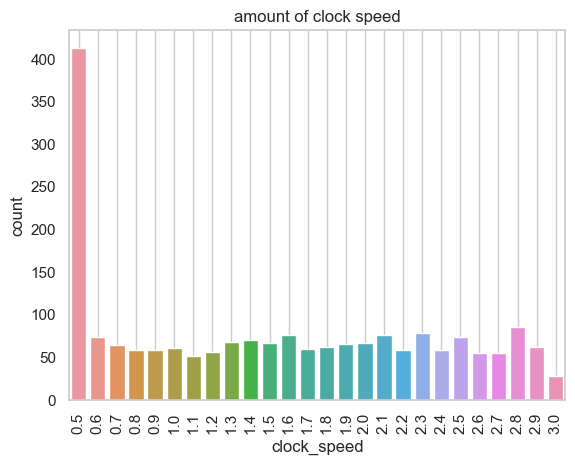

In [17]:
sns.countplot(x=df['clock_speed'])
plt.xticks(rotation=90)
plt.title('amount of clock speed')
plt.grid()

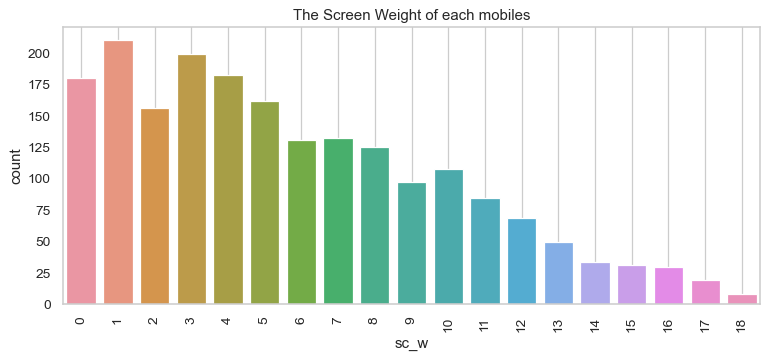

In [18]:
plt.figure(figsize=(10,4),dpi=90)
sns.countplot(x=df['sc_w'])
plt.xticks(rotation=90)
plt.title('The Screen Weight of each mobiles')
plt.grid()

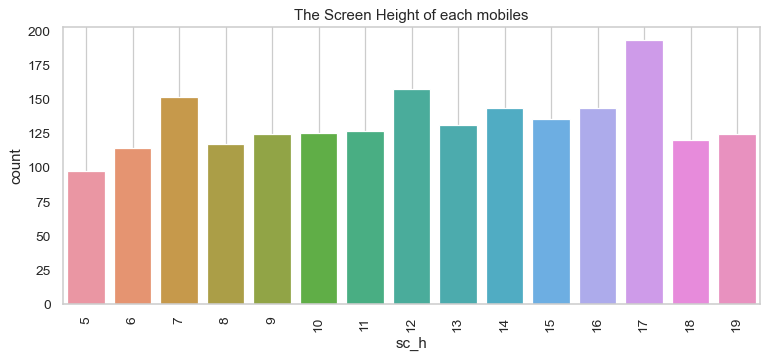

In [19]:
plt.figure(figsize=(10,4),dpi=90)
sns.countplot(x=df['sc_h'])
plt.xticks(rotation=90)
plt.title('The Screen Height of each mobiles')
plt.grid()

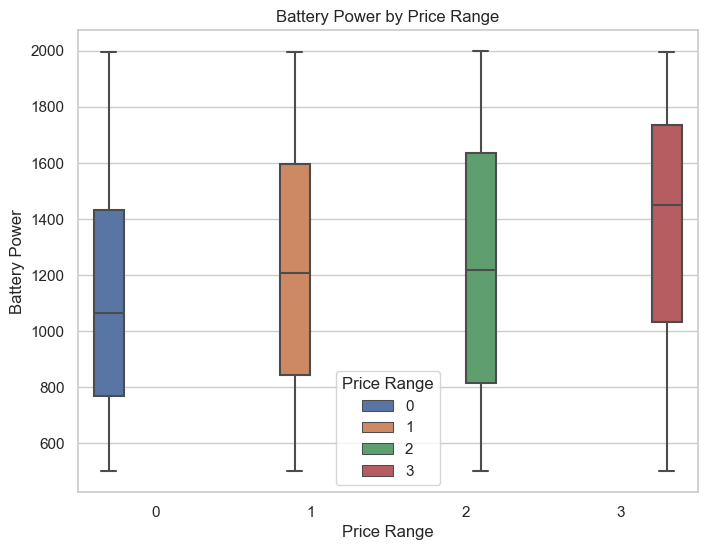

In [20]:
sns.set(style="whitegrid")

# Create the box plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='price_range', y='battery_power', data=df, hue='price_range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power by Price Range')
plt.legend(title='Price Range')
plt.show()


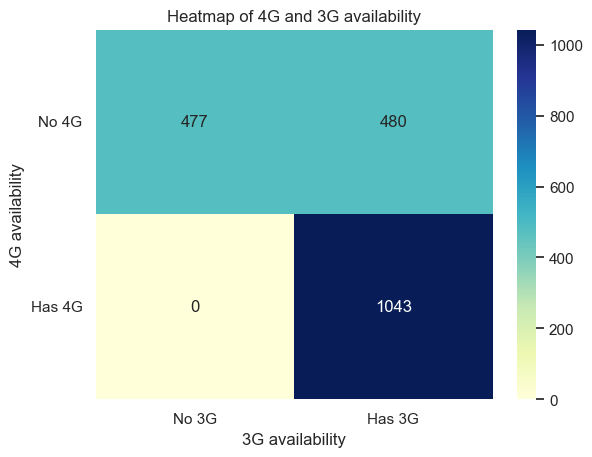

In [21]:
contingency_table = pd.crosstab(df['four_g'], df['three_g'])

sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of 4G and 3G availability')
plt.xlabel('3G availability')
plt.ylabel('4G availability')
plt.xticks([0.5,1.5], ['No 3G', 'Has 3G'])
plt.yticks([0.5,1.5], ['No 4G', 'Has 4G'], rotation=0)
plt.show()


<h1> Step 2. Data preparation

In [22]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)


Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []


In [25]:
#Rows where sc_w is 0.
df_sc_w_0=df[df['sc_w']==0]
df_sc_w_0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,11,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,17,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,1,64,745,1503,10,0,13,0,0,0,0


In [26]:
df_px_h_0=df[df['px_height']==0]
df_px_h_0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [27]:
df=df.drop(df[df['sc_w']==0].index)
df=df.drop(df[df['px_height']==0].index)

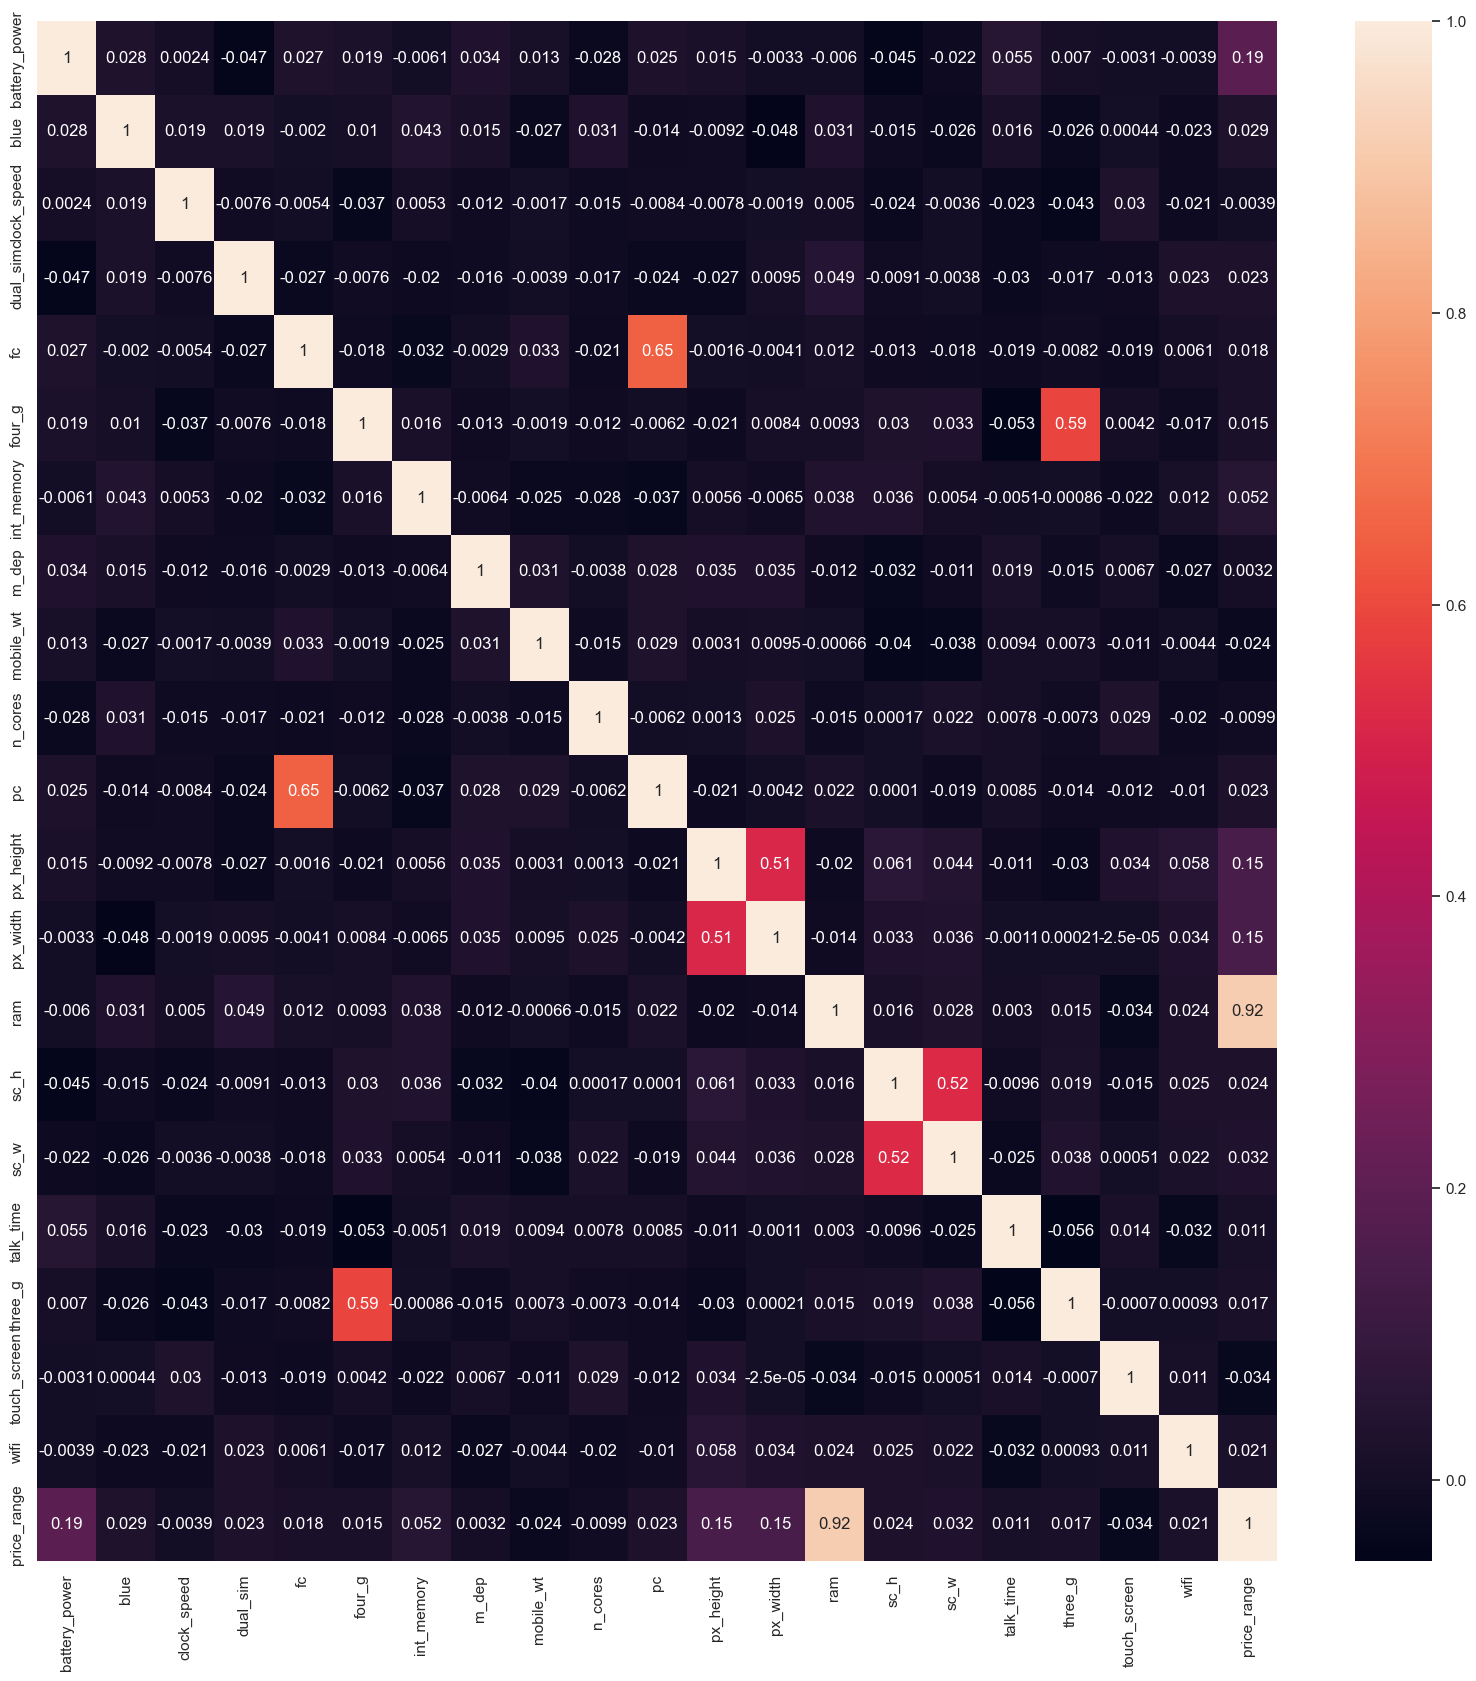

In [28]:
corr = df.corr()


# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [29]:
##ekraani laiuse ja kõrguse asemel arvutada diagonaal

#kas four g telodel kõikidel on 3g?

#EDA ANALÜÜS

In [30]:
def network_type(row):
    if row['four_g'] == 1:
        return 2
    elif row['three_g'] == 1:
        return 1
    else:
        return 0

df['network_type'] = df.apply(network_type, axis=1)


In [31]:
def height_width_to_diagonal(height, width):
  return math.sqrt(height**2 + width**2)

diagonals = []

for index, row in df.iterrows():
  diagonal = round(height_width_to_diagonal(row["sc_h"], row["sc_w"]),1)
  diagonals.append(diagonal)

df['diagonals'] = diagonals


In [32]:
#df['pixel_area'] = df['px_height'] * df['px_width']


In [33]:
df_train_Y = df["price_range"]   
df_train_X = df.drop('price_range', axis=1)


In [34]:
df_train_X = df_train_X.drop(['sc_h', 'sc_w', 'four_g','three_g', 'sc_h', 'sc_w'], axis = 1)
df_train_X

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,touch_screen,wifi,network_type,diagonals
0,842,0,2.2,0,1,7,0.6,188,2,2,20,756,2549,19,0,1,0,11.4
1,1021,1,0.5,1,0,53,0.7,136,3,6,905,1988,2631,7,1,0,2,17.3
2,563,1,0.5,1,2,41,0.9,145,5,6,1263,1716,2603,9,1,0,2,11.2
3,615,1,2.5,0,0,10,0.8,131,6,9,1216,1786,2769,11,0,0,1,17.9
4,1821,1,1.2,0,13,44,0.6,141,2,14,1208,1212,1411,15,1,0,2,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,2,0.8,106,6,14,1222,1890,668,19,1,0,2,13.6
1996,1965,1,2.6,1,0,39,0.2,187,4,3,915,1965,2032,16,1,1,1,14.9
1997,1911,0,0.9,1,1,36,0.7,108,8,3,868,1632,3057,5,1,0,2,9.1
1998,1512,0,0.9,0,4,46,0.1,145,5,5,336,670,869,19,1,1,2,20.6


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df_X_scaled=scaler.fit_transform(df_train_X)

df_X_scaled = pd.DataFrame(df_X_scaled, columns=df_train_X.columns)


In [36]:
df_X_scaled

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,touch_screen,wifi,network_type,diagonals
0,0.227789,0.0,0.68,0.0,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.009699,0.170895,0.612774,0.944444,0.0,1.0,0.0,0.298578
1,0.347361,1.0,0.00,1.0,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461460,0.993324,0.634687,0.277778,1.0,0.0,1.0,0.578199
2,0.041416,1.0,0.00,1.0,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644206,0.811749,0.627205,0.388889,1.0,0.0,1.0,0.289100
3,0.076152,1.0,0.80,0.0,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620214,0.858478,0.671566,0.500000,0.0,0.0,0.5,0.606635
4,0.881764,1.0,0.28,0.0,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616131,0.475300,0.308658,0.722222,1.0,0.0,1.0,0.146919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,0.195725,1.0,0.00,1.0,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623277,0.927904,0.110102,0.944444,1.0,0.0,1.0,0.402844
1815,0.977956,1.0,0.84,1.0,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466565,0.977971,0.474613,0.777778,1.0,1.0,0.5,0.464455
1816,0.941884,0.0,0.16,1.0,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442573,0.755674,0.748530,0.166667,1.0,0.0,1.0,0.189573
1817,0.675351,0.0,0.16,0.0,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171006,0.113485,0.163816,0.944444,1.0,1.0,1.0,0.734597


<h1> Model Training</h1>

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC



In [38]:

X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, df_train_Y, test_size=0.20, random_state=42)


<h4>KNeighborsClassifier</h4>

In [40]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)<h4>KNeighborsClassifier</h4>

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN_100:', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy of KNN_100: 0.5412087912087912

Confusion Matrix:
[[62 11  7  0]
 [33 28 33  2]
 [ 1 26 49 22]
 [ 0  1 31 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.70        80
           1       0.42      0.29      0.35        96
           2       0.41      0.50      0.45        98
           3       0.71      0.64      0.67        90

    accuracy                           0.54       364
   macro avg       0.55      0.55      0.54       364
weighted avg       0.54      0.54      0.53       364



<h4>RandomForestClassifier</h4>

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of RandomForestClassifier: {accuracy:.4f}")

Accuracy of RandomForestClassifier: 0.8929


<h4>DecisionTreeClassifier</h4>

In [45]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree<h4>DecisionTreeClassifier</h4>:', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy of decision tree: 0.8241758241758241

Confusion Matrix:
[[70 10  0  0]
 [10 72 14  0]
 [ 0  9 74 15]
 [ 0  0  6 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        80
           1       0.79      0.75      0.77        96
           2       0.79      0.76      0.77        98
           3       0.85      0.93      0.89        90

    accuracy                           0.82       364
   macro avg       0.83      0.83      0.83       364
weighted avg       0.82      0.82      0.82       364



<h4>Support Vector Machine</h4>

In [78]:
results_df = pd.DataFrame(columns=['model', 'accuracy'])

svm = LinearSVC(random_state = 42).fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_linear", 'accuracy': acc}])], ignore_index=True)

svm_poly = SVC(kernel='poly', random_state = 42).fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_poly", 'accuracy': acc}])], ignore_index=True)

svm_rbf = SVC(kernel='rbf', random_state = 42).fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_rbf", 'accuracy': acc}])], ignore_index=True)

svm_sigmoid = SVC(kernel='sigmoid', random_state = 42).fit(X_train, y_train)
y_pred = svm_sigmoid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_sigmoid", 'accuracy': acc}])], ignore_index=True)

results_df

C:\Users\Sander\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,model,accuracy
0,svm_linear,0.486264
1,svm_poly,0.953297
2,svm_rbf,0.939560
3,svm_sigmoid,0.131868


In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = LinearSVC(random_state = 42).fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_linear(scaled)", 'accuracy': acc}])], ignore_index=True)

svm_poly = SVC(kernel='poly', random_state = 42).fit(X_train_scaled, y_train)
y_pred = svm_poly.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_poly(scaled)", 'accuracy': acc}])], ignore_index=True)

svm_rbf = SVC(kernel='rbf', random_state = 42).fit(X_train_scaled, y_train)
y_pred = svm_rbf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_rbf(scaled)", 'accuracy': acc}])], ignore_index=True)

svm_sigmoid = SVC(kernel='sigmoid', random_state = 42).fit(X_train_scaled, y_train)
y_pred = svm_sigmoid.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
results_df = pd.concat([results_df, pd.DataFrame([{'model': "svm_sigmoid(scaled)", 'accuracy': acc}])], ignore_index=True)

results_df

C:\Users\Sander\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,model,accuracy
0,svm_linear,0.486264
1,svm_poly,0.953297
2,svm_rbf,0.939560
3,svm_sigmoid,0.131868
4,svm_linear(scaled),0.843407
5,svm_poly(scaled),0.769231
6,svm_rbf(scaled),0.892857
7,svm_sigmoid(scaled),0.917582


<h4>Linear Regression / Lasso / Ridge </h4>

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold_linear

linearRegression = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

linearRegression_pred = linearRegression.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

linearRegression_MSE = mean_squared_error(y_test, linearRegression_pred)
ridge_MSE = mean_squared_error(y_test, ridge_pred)
lasso_MSE = mean_squared_error(y_test, lasso_pred)

print("linearRegression_MSE = " + str(linearRegression_MSE))
print("ridge_MSE = " + str(ridge_MSE))
print("lasso_MSE = " + str(lasso_MSE))

linearRegression_MSE = 0.10291829431331334
ridge_MSE = 0.1029138111275721
lasso_MSE = 0.1050444019531738


<h1> Hyperparametering</h1>

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

<h4>KNeighborsClassifier</h4>

In [51]:
param_grid = {
    'n_neighbors': [5, 10, 50, 100, 200, 400],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'euclidean'],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30, 50, 70, 100]
}

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.9333333333333332
Test Set Accuracy: 0.9093406593406593


<strong>KNN best params:</strong> {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
    
<strong>KNN best score:</strong> 0.93333

<strong>KNN best accuracy:</strong> 0.90934

<h4>RandomForestClassifier</h4>

In [49]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,5,10,15,20],
    'min_samples_leaf': [1,5,10,15,20],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8824742268041238
Test Set Accuracy: 0.8873626373626373


<strong>Random forest best params:</strong> {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

<strong>Random forest best score:</strong> 0.88247

<strong>Random forest best accuracy:</strong> 0.88736

<h4>DecisionTreeClassifier</h4>

In [50]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [3, 6, 12],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters (DecisionTree):", best_params_dt)
print("Best Score (DecisionTree):", best_score_dt)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters (DecisionTree): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}
Best Score (DecisionTree): 0.8604810996563576
Test Set Accuracy: 0.8873626373626373


<strong>Decision tree best params:</strong> {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}

<strong>Decision tree best score:</strong> 0.86048

<strong>Decision tree best accuracy:</strong> 0.88736

<h4>Support Vector Machine</h4>

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_Y, test_size=0.2, random_state=42)

param_grid_svm = {
    'C': np.arange(1, 100, 10),
    'gamma': [0.1, 1, 'auto', 'scale'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}


svc_classificer = SVC()

grid_search_svm = GridSearchCV(svc_classificer, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters (SVM):", best_params_svm)
print("Best Score (SVM):", best_score_svm)

Best Parameters (SVM): {'C': 11, 'gamma': 0.1, 'kernel': 'linear'}
Best Score (SVM): 0.9690721649484535


<strong>SVM best params:</strong> {'C': 11, 'gamma': 0.1, 'kernel': 'linear'}

<strong>SVM best score:</strong> 0.96907

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_svm = {
    'C': np.arange(1, 100, 10),
    'gamma': [0.1, 1, 'auto', 'scale'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}


svc_classificer = SVC()

grid_search_svm = GridSearchCV(svc_classificer, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svm.fit(X_train_scaled, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters (SVM):", best_params_svm)
print("Best Score (SVM):", best_score_svm)

Best Parameters (SVM): {'C': 31, 'gamma': 0.1, 'kernel': 'linear'}
Best Score (SVM): 0.9690721649484535


<strong>SVM(scaled) best params:</strong> {'C': 11, 'gamma': 0.1, 'kernel': 'linear'}

<strong>SVM(scaled) best score:</strong> 0.96907

<h4>Lasso / Ridge </h4>

In [64]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from math import sqrt
from sklearn.metrics import mean_absolute_error

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)

lassocv = LassoCV(cv=5)
lassocv.fit(X_train, y_train)

ridge_best_alpha = ridgecv.alpha_
lasso_best_alpha = lassocv.alpha_
print("Ridge best alpha %.4f" % ridge_best_alpha)
print("Lasso best alpha %.4f" % lasso_best_alpha)

ridge_y_pred = Ridge(alpha = ridge_best_alpha).fit(X_train, y_train).predict(X_test)
lasso_y_pred = Lasso(alpha = lasso_best_alpha).fit(X_train, y_train).predict(X_test)

new_ridge_MSE = mean_squared_error(y_test, ridge_y_pred)
new_lasso_MSE = mean_squared_error(y_test, lasso_y_pred)

new_ridge_RMSE = sqrt(new_ridge_MSE)
new_lasso_RMSE = sqrt(new_lasso_MSE)

new_ridge_MAE = mean_absolute_error(y_test, ridge_y_pred)
new_lasso_MAE = mean_absolute_error(y_test, lasso_y_pred)

print()
print('RIDGE:')
print("MSE = ", new_ridge_MSE)
print("RMSE = ", new_ridge_RMSE)
print("MAE = ", new_ridge_MAE)
print()
print('LASSO:')
print("MSE = ",new_lasso_MSE)
print("RMSE = ", new_lasso_RMSE)
print("MAE = ", new_lasso_MAE)

Ridge best alpha 10.0000
Lasso best alpha 1.1376

RIDGE:
MSE =  0.1028757697198889
RMSE =  0.3207425287047056
MAE =  0.269629060892419

LASSO:
MSE =  0.10507925673663414
RMSE =  0.3241593076507817
MAE =  0.2731851069881877
